In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Python Datasets/Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<ipython-input-5-0f11b4f8e314>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'])
<ipython-input-5-0f11b4f8e314>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<function matplotlib.pyplot.show(close=None, block=None)>

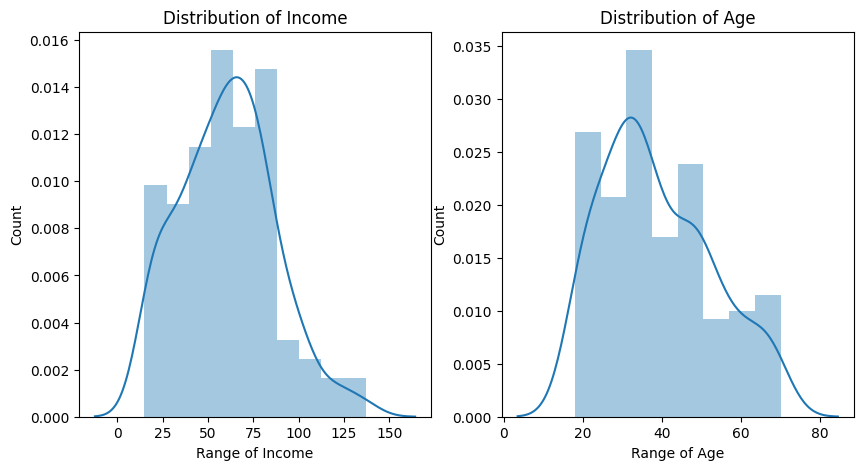

In [5]:
#Distribution of Income
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Income')
plt.xlabel('Range of Income')
plt.ylabel('Count')
# Distribution plot of Age
plt.subplot(1,2,2)
sns.distplot(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show

In [6]:
df=data.iloc[:,[3,4]].values
print(df.shape)

(200, 2)


In [7]:
# Model building using random number for clusters
from sklearn.cluster import KMeans
km= KMeans(n_clusters=2, init='k-means++', max_iter=300,n_init=10,random_state=41)

In [8]:
km.fit(df)

KMeans(n_clusters=2, n_init=10, random_state=41)

In [9]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [10]:
y_means=km.fit_predict(df)

In [11]:
df[y_means==0,0]

array([15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21,
       21, 23, 23, 24, 24, 25, 25, 28, 28, 28, 28, 29, 29, 30, 30, 33, 33,
       33, 33, 34, 34, 37, 37, 38, 38, 39, 39, 39, 39, 40, 40, 40, 40, 42,
       42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46, 47, 47, 48, 48, 48, 48,
       48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
       54, 57, 57, 58, 58])

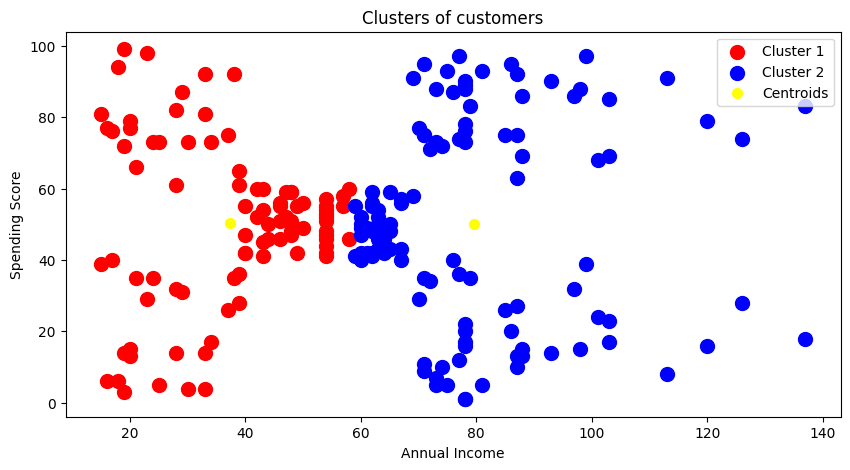

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(df[y_means==0,0],df[y_means==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(df[y_means==1,0],df[y_means==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=50,c='yellow',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()


In [13]:
from sklearn.metrics import silhouette_score

In [15]:
silhouette_avg=silhouette_score(df,y_means)
silhouette_avg

0.2968969162503008

In [16]:
wcss=[]
for i in range(1,11):
  km1=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  km1.fit(df)
  wcss.append(km1.inertia_)

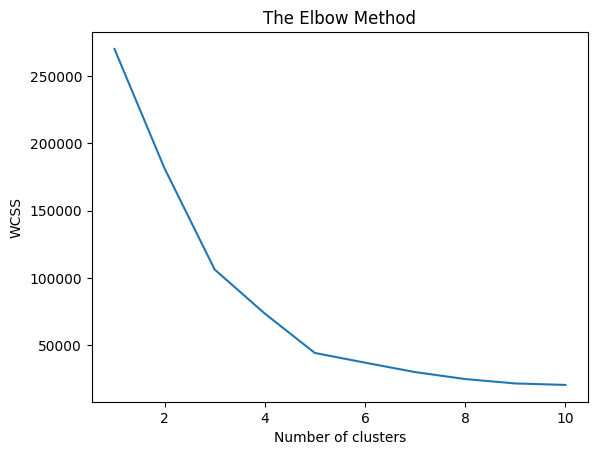

In [17]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
km1=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means1=km1.fit_predict(df)

In [25]:
silhouette_avg=silhouette_score(df,y_means1)
silhouette_avg

0.553931997444648

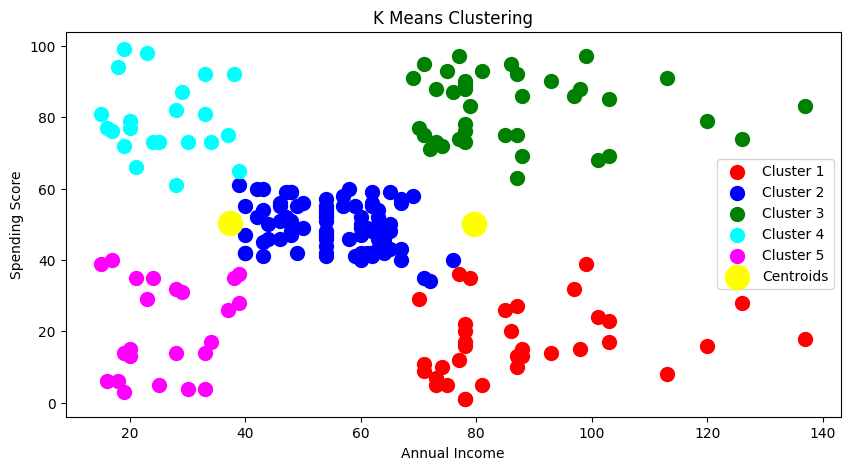

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(df[y_means1==0,0],df[y_means1==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(df[y_means1==1,0],df[y_means1==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(df[y_means1==2,0],df[y_means1==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(df[y_means1==3,0],df[y_means1==3,1],s=100,c='cyan',label='Cluster 4')
plt.scatter(df[y_means1==4,0],df[y_means1==4,1],s=100,c='magenta',label='Cluster 5')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()